In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Product:
    # constructor
    def __init__(self, id_, price_list):
        self.id_ = id_
        # possible choices of price
        self.price_list = price_list
        # actual price
        self.price = price_list[0]
        # index of the actual price
        self.idx = 0
        # self.secondaries = [] secondaries slots of a prouct are chosen by the graph of influence probabilities, generated for each user

    # set the four new possible choices of the prices
    def set_new_price_list(self, price_list):
        self.price_list = price_list
        self.price = price_list[0]


    # change the actual price between one of the possible choice ordered with increasing prices
    def change_price(self, new_index):
        self.price = self.price_list[new_index]


    # increase by one step the price in the vector of possible prices
    def increase_price(self):
        if self.price == max(self.price_list):
            return
        else:
            self.price = self.price_list[self.idx + 1]
            self.idx += 1


    # decrease by one step the price in the vector of possible prices
    def decrease_price(self):
        if self.price == min(self.price_list):
            return
        else:
            self.price = self.price_list[self.idx - 1]
            self.idx -= 1

In [3]:
P1 = Product(0,[10,13,16,19])
P2 = Product(1,[20,23,26,29])
P3 = Product(2,[30,33,36,39])
P4 = Product(3,[40,43,46,49])
P5 = Product(4,[50,53,56,59])

products = [P1,P2,P3,P4,P5]
sell_values = np.array([P1.price_list, P2.price_list,P3.price_list, P4.price_list, P5.price_list])
#Hp: the costs are 70% of the lower prices
cost_values = 0.7 * sell_values[:,0]
#matrix with the difference between prices and costs
#mij margins on the price j for the product i
margins = sell_values - np.array([cost_values,cost_values,cost_values,cost_values]).T
margins

array([[ 3.,  6.,  9., 12.],
       [ 6.,  9., 12., 15.],
       [ 9., 12., 15., 18.],
       [12., 15., 18., 21.],
       [15., 18., 21., 24.]])

In [4]:
#Conversion rate matrix
#in this step all conversion rates are known
#pij conversion rate of price j for the product i
#with higer price (j+1>j) -> lower conversion rate
p1 = np.array([0.38, 0.16, 0.15, 0.1])
p2 = np.array([0.42, 0.41, 0.18, 0.12])
p3 = np.array([0.32, 0.28, 0.17, 0.13])
p4 = np.array([0.36, 0.33, 0.25, 0.18])
p5 = np.array([0.30, 0.29, 0.22, 0.15])
C = np.array([p1,p2,p3,p4,p5])
C

array([[0.38, 0.16, 0.15, 0.1 ],
       [0.42, 0.41, 0.18, 0.12],
       [0.32, 0.28, 0.17, 0.13],
       [0.36, 0.33, 0.25, 0.18],
       [0.3 , 0.29, 0.22, 0.15]])

In [5]:
#greedy algorithm
#iteration 0
#p00,p10,p20,p30,p40
#compute reward

#iteration 1
#p01,p10,p20,p30,p40 
# save reward if it is better
#p00,p11,p20,p30,p40 
# save reward if it is better
#p00,p10,p21,p30,p40             #[] the best
# save reward if it is better
#p00,p10,p20,p31,p40 
# save reward if it is better
#p00,p10,p20,p30,p41 
# save reward if it is better

#se nessuna è meglio del passo 0 STOP

#iteration 2
#if the best is []
#p01,p10,p21,p30,p40   
# save reward if it is better
#p00,p11,p21,p30,p40  
# save reward if it is better
#p00,p10,p22,p30,p40 
# save reward if it is better
#p00,p10,p21,p31,p40 
# save reward if it is better
#p00,p10,p21,p30,p41 
# save reward if it is better

#if nothing is better than step 1 STOP

#l'algoritmo non deve ciclare pechè è greedy: sceglie la soluzione migliore in quel momento (non ricontrolla le combinazioni)
#il numero di iterazioni varia tra 1 e 20 (nel caso in cui la configurazione migliore sia aumentare il prezzo di tutti uno alla volta)

In [6]:
#idea for reward computation
configuration_0 = C[:,0]
#unitary_reward = conv_rate * margins (we don't need the total reward, since we have conversion rates known)
reward = sum(configuration_0 * margins[:,0])
reward

15.36

In [29]:
#Greedy Algorithm
#Optimization of the cumulative EXPECTED margin over all the products

def Greedy_Algorithm(Conv_matrix, Margins_matrix):
    
    C2 = Conv_matrix
    M = Margins_matrix
    flag = 0
    best_config = [] #to save indexes which icreased their price
    rewards_collected = []
    max_collected = []

    #initial step
    #reward of the configuration 0
    max = sum(C2[:,0] * M[:,0])
    rewards_collected.append(max)
    max_collected.append(max)

    for i in range(0,4):

        #if the iteration doesn't find a better configuration -> stop
        if flag==0 and i!=0:
            print("STOP")
            break

        #update the margin and the conversion rate of the kth element:
        #if in the previous iteration the maximum was updated it means that the kth product
        #has increased its price by one (since we got a better configuration for the reward)
        #So we don't reset the matrix for it starts with a new price increased by one:
        if flag!=0 and i+1<4:
            C2[k,i] = C2[k,i+1]
            M[k,i] = M[k,i+1]
            flag = 0
        
        print("__________________")
        print("Iterazione ", i+1)
        for j in range(0,5):

            #if i+1 is not out of bound -> increase price of jth product by 1
            #and compute reward
            if i+1<4:
                reward = 0
                for a in range(0,5):
                    if a!=j:
                       reward = reward + C2[a,i] * M[a,i]
                reward = reward + C2[j,i+1] * M[j,i+1]
            
            print(reward)
            rewards_collected.append(reward)

            if reward>max:
                max = reward
                k = j #save the product that in this iteration has increased the margin
                flag = 1 #since we foud a new maximum
                best_config.append(k)
                max_collected.append(max)

    print("__________________")
    print("max unitary reward: ", max)
    print("__________________")
    print("best configuration: ")
    for i in range(0, len(best_config)):
      print(i+1, "): ")
      print("increase price of the product", best_config[i]+1)
    return [max,best_config, rewards_collected, max_collected]

In [43]:
C = C = np.array([p1,p2,p3,p4,p5])
margins = sell_values - np.array([cost_values,cost_values,cost_values,cost_values]).T
lista = Greedy_Algorithm(C, margins) 
max_found = lista[0]
products_to_increase = lista[1]
rewards_per_configuration = lista[2]
max_reward_per_iteration = lista[3]

__________________
Iterazione  1
15.18
16.53
15.84
15.989999999999998
16.08
__________________
Iterazione  2
17.040000000000003
16.65
15.84
16.2
16.05
__________________
Iterazione  3
15.030000000000001
14.670000000000002
14.82
14.31
14.01
STOP
__________________
max unitary reward:  17.040000000000003
__________________
best configuration: 
1 ): 
increase price of the product 2
2 ): 
increase price of the product 1


In [11]:
C*margins

array([[1.14, 0.96, 1.2 , 1.2 ],
       [2.52, 2.16, 2.16, 1.8 ],
       [2.88, 3.36, 2.55, 2.34],
       [4.32, 4.95, 4.5 , 3.78],
       [4.5 , 5.22, 4.62, 3.6 ]])

In [17]:
opt = (C*margins)[0,2] + (C*margins)[1,0] + (C*margins)[2,1] + (C*margins)[3,1] + (C*margins)[4,1]
opt

17.25

In [42]:
rewards_per_configuration

[1, 0]

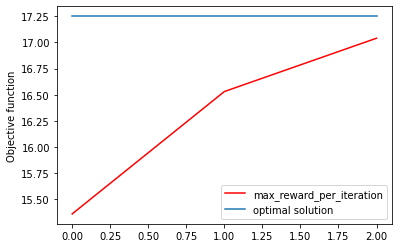

In [78]:
plt.ylabel("Objective function") #maximization of the cumulative expected margin over all the products
plt.plot(max_reward_per_iteration, 'r')
plt.plot(np.ones(len(max_reward_per_iteration))*opt)
plt.legend(["max_reward_per_iteration", "optimal solution"])
#we can see hpw greedy algorithm not always reach the optimal solution

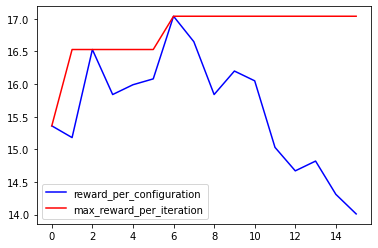

In [77]:
max_reward_to_plot = [max_reward_per_iteration[0],max_reward_per_iteration[1],max_reward_per_iteration[1],max_reward_per_iteration[1],max_reward_per_iteration[1],max_reward_per_iteration[1], max_reward_per_iteration[2],max_reward_per_iteration[2],max_reward_per_iteration[2],max_reward_per_iteration[2],max_reward_per_iteration[2],max_reward_per_iteration[2],max_reward_per_iteration[2],max_reward_per_iteration[2],max_reward_per_iteration[2],max_reward_per_iteration[2]]
plt.plot(rewards_per_configuration, 'b')
plt.plot(max_reward_to_plot, 'r')
plt.legend(["reward_per_configuration","max_reward_per_iteration"])

In [56]:
np.ones(5)*max_reward_per_iteration[1]

array([16.53, 16.53, 16.53, 16.53, 16.53])

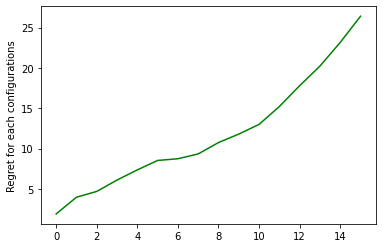

In [26]:
plt.ylabel("Regret for each configuration")
plt.plot(np.cumsum(opt - rewards_per_configuration, axis=0), 'g')

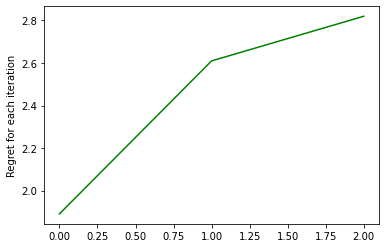

In [31]:
plt.ylabel("Regret for each iteration")
plt.plot(np.cumsum(opt - max_reward_per_iteration, axis=0), 'g')